In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Creates visualizations
import seaborn as sns # Makes data visualizations easier
from sklearn.cluster import KMeans   # K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # Normalizes data for better clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  # Hierarchical clustering tools


In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")


In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()  # Checking missing values

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [38]:
# Convert Gender to numerical values
df['Gender'] = df['Genre'].map({'Male': 0, 'Female': 1})

In [7]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
#renamed for simplicity

In [39]:
df.head()

,CustomerID,Genre,Age,Income,Spending_Score,Cluster,Cluster_HC,Gender
0,1,Male,19,15,39,2,2,0
1,2,Male,21,15,81,2,1,0
2,3,Female,20,16,6,0,2,1
3,4,Female,23,16,77,2,1,1
4,5,Female,31,17,40,0,2,1


Visualization

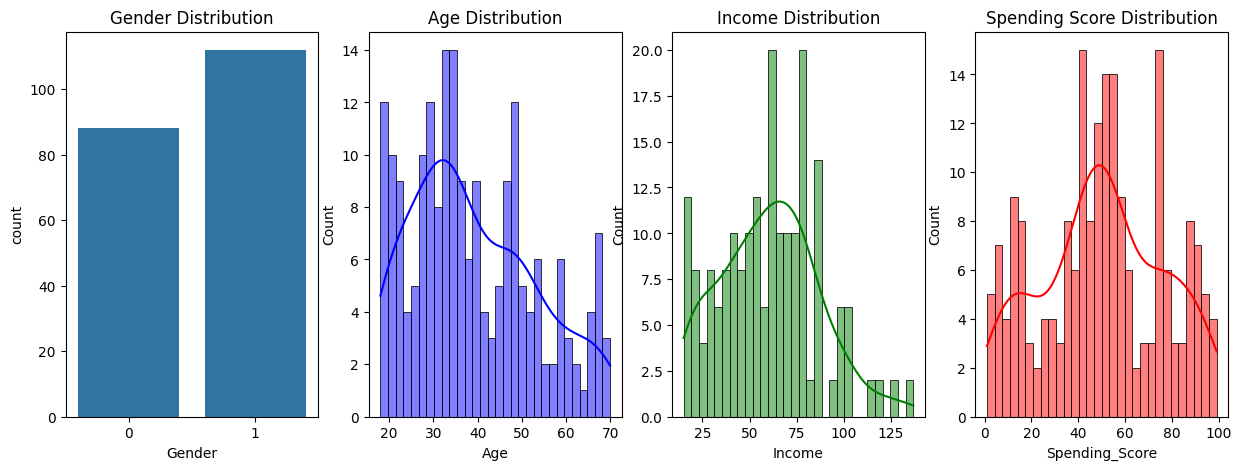

In [40]:
plt.figure(figsize =(15,5))

plt.subplot(1,4,1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.subplot(1,4,2)
sns.histplot(df['Age'],bins=30,kde=True,color='blue')
plt.title('Age Distribution')

plt.subplot(1,4,3)
sns.histplot(df['Income'],bins=30,kde=True, color='green')
plt.title('Income Distribution')

plt.subplot(1,4,4)
sns.histplot(df['Spending_Score'],bins=30,kde=True,color='red')
plt.title('Spending Score Distribution')

plt.show()

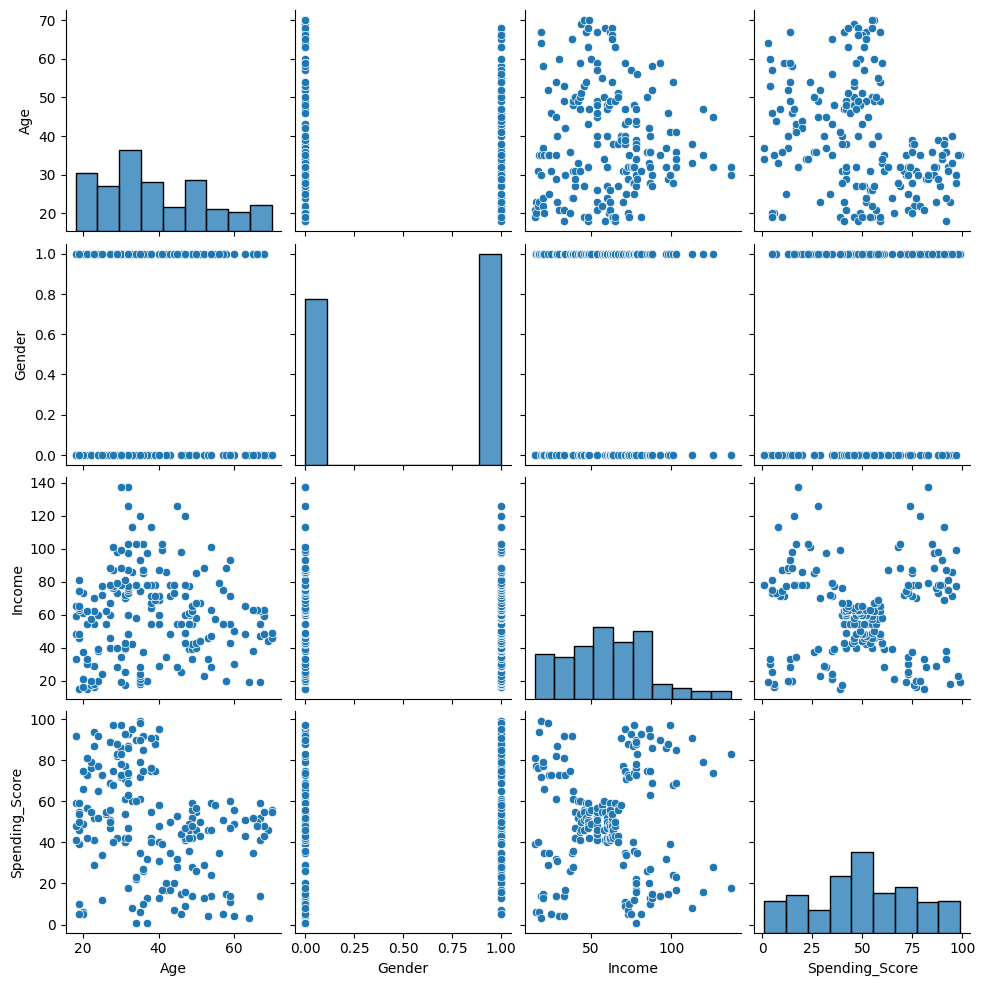

In [42]:
sns.pairplot(df[['Age','Gender', 'Income', 'Spending_Score']])


K-Mean Clustering

In [47]:
X = df[['Age','Gender','Income', 'Spending_Score']]    # selecting features for clustering

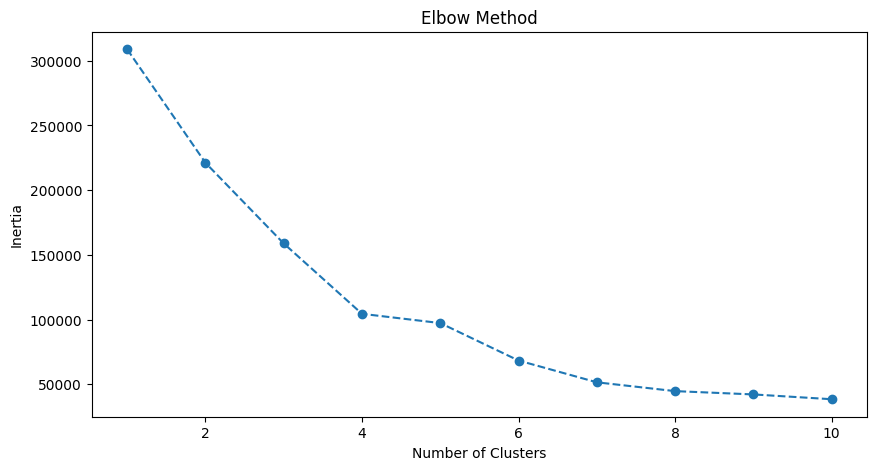

In [48]:
inertia = []                   # the Elbow Method
for n in range(1,11):
  kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()




In [49]:
kmeans = KMeans(n_clusters=5, random_state=42)   #K-Means Clustering
df['Cluster'] = kmeans.fit_predict(X)

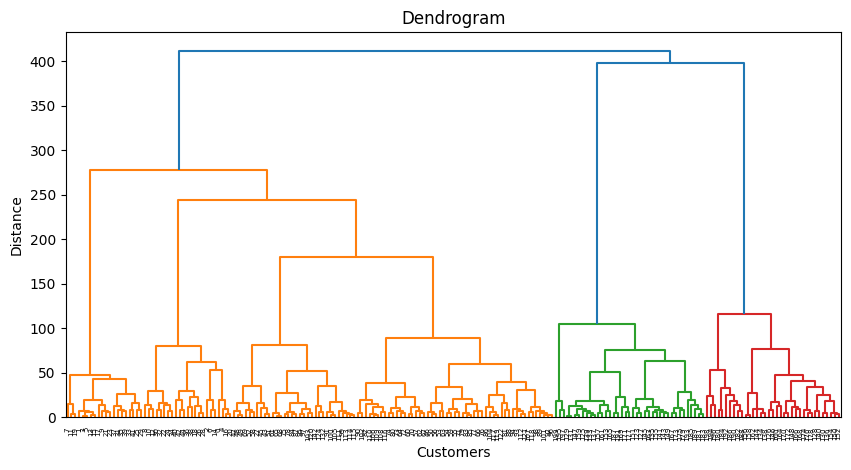

In [50]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


In [51]:
df['Cluster_HC'] = fcluster(linked, 5, criterion='maxclust') #Hierarchical Clustering


Visualizing

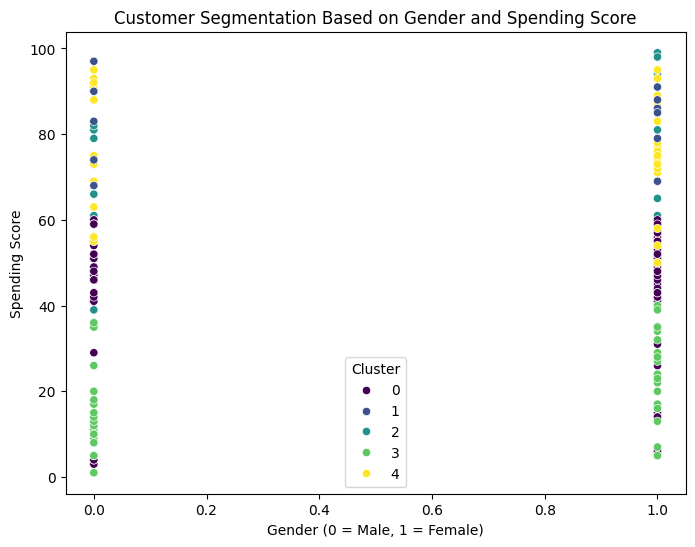

In [54]:
plt.figure(figsize=(8,6))  #  Gender vs Spending Score
sns.scatterplot(x=df['Gender'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation Based on Gender and Spending Score')
plt.show()


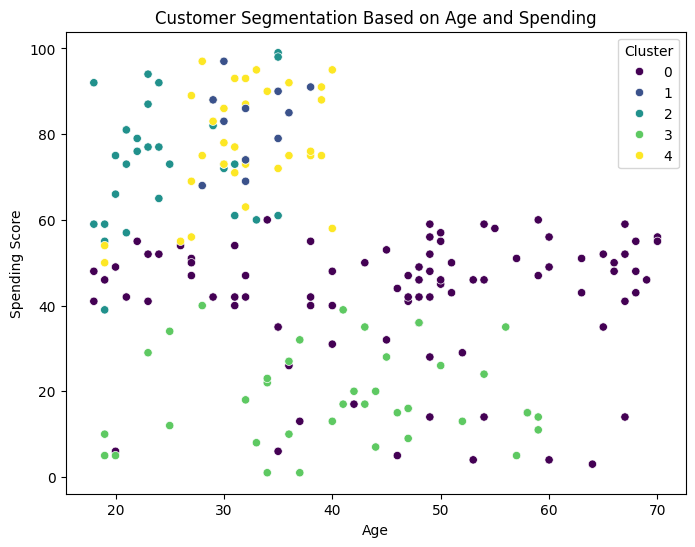

In [32]:
plt.figure(figsize=(8, 6))         # Age vs Spending Score
sns.scatterplot(x=df['Age'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation Based on Age and Spending')
plt.show()


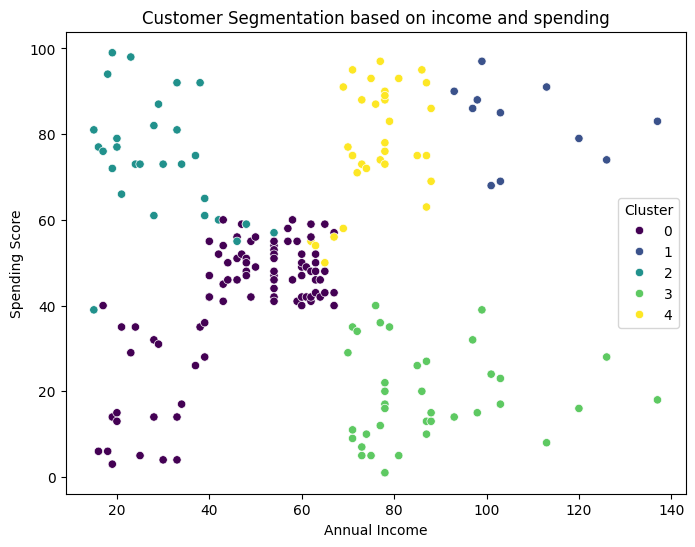

In [31]:
plt.figure(figsize=(8, 6))            # Income vs Spending Score
sns.scatterplot(x=df['Income'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation based on income and spending')
plt.show()
